First import our dependencies


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


Read the stock data using the pandas library


In [2]:
data = pd.read_csv('StockData.csv')


Print the pandas csv library

In [4]:
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


Drop the date column by doing this

In [5]:
data = data.drop(columns=['Date'])

Print the data again

In [6]:
data

,Open,High,Low,Close,Volume,Adj Close
0,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
1687,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


Now we are going to scale our data. Do you know why this is good?

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit(data)
X_scaled = scaler.transform(data)

Now we need to get our results (close price) to compare and train our predictions with.




In [7]:
ydata = data['Close'].values


Next we need to reshape the values so it can be scaled. This is not necessary but is required for the minmax scaler.

In [ ]:
y = ydata.reshape(-1,1)

Now we need to minmax scale the y values

In [ ]:
yscaler = MinMaxScaler(feature_range=(0, 1)).fit(y)
y = yscaler.transform(y)

We are going to split our data into train and test data.

In [8]:
split = int(len(X_scaled) * 0.8)
print(split)
Xtrain = X_scaled[:split-1]
Xtest = X_scaled[split : len(X_scaled)-1]
ytrain = y[1:split]
ytest = y[split+1 : len(y)]

1353


In [13]:
Xtrain[1]


array([0.03553936, 0.05018378, 0.03134654, 0.02971433, 0.46074816,
       0.02971433])

In [15]:
ytrain[2]

array([0.01258141])

Create and compile the tensorflow model.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(6))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
model.fit(Xtrain, ytrain, epochs=20)

Epoch 1/20
43/43 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 2/20
43/43 [==============================] - 0s 2ms/step - loss: 3.4443e-04
Epoch 3/20
43/43 [==============================] - 0s 2ms/step - loss: 2.7291e-04
Epoch 4/20
43/43 [==============================] - 0s 2ms/step - loss: 2.7496e-04
Epoch 5/20
43/43 [==============================] - 0s 2ms/step - loss: 2.6979e-04
Epoch 6/20
43/43 [==============================] - 0s 2ms/step - loss: 3.2291e-04
Epoch 7/20
43/43 [==============================] - 0s 2ms/step - loss: 2.7021e-04
Epoch 8/20
43/43 [==============================] - 0s 2ms/step - loss: 2.7378e-04
Epoch 9/20
43/43 [==============================] - 0s 2ms/step - loss: 2.7625e-04
Epoch 10/20
43/43 [==============================] - 0s 2ms/step - loss: 2.8158e-04
Epoch 11/20
43/43 [==============================] - 0s 2ms/step - loss: 2.8590e-04
Epoch 12/20
43/43 [==============================] - 0s 2ms/step - loss: 2.7097e-04
Epoch

In [10]:
model.evaluate(Xtest,ytest)

11/11 [==============================] - 0s 2ms/step - loss: 3.6389e-04


0.00036389214801602066

In [11]:
Prediction = model.predict(Xtest)

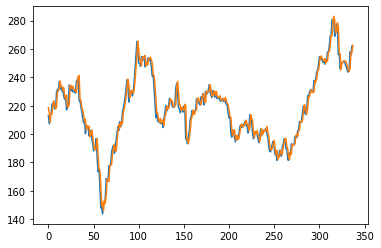

In [12]:
import matplotlib.pyplot as plt
unscaledPrediction = yscaler.inverse_transform(Prediction)
ytestunscaled = yscaler.inverse_transform(ytest)
plt.plot(ytestunscaled)
plt.plot(unscaledPrediction)